In [1]:
#Import all packages needed

import snscrape.modules.twitter as sntwitter
import pandas as pd
!pip install wordcloud
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import csv

#Scrap a Twitter account with SnScrape and convert it to a data frame.


def twitter_scraper(twitter_account):
    query = "(from:" + twitter_account + ") until:2023-01-27 since:2017-05-17"
    tweets = []
    limit = 15000

    for tweet in sntwitter.TwitterSearchScraper(query).get_items():
        if len(tweets) == limit:
            break
        else:
            tweets.append([tweet.date, tweet.user.username or tweet.username, tweet.rawContent or tweet.content])

    df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
    #df.Tweet.to_excel('df_' + twitter_account + '.xlsx')
    return df

#Put here the Twitter account you want to scrap.
account = "MarleneSchiappa"

result = twitter_scraper(account)
print(result)




                          Date             User  \
0    2023-01-26 21:14:34+00:00  MarleneSchiappa   
1    2023-01-26 18:09:43+00:00  MarleneSchiappa   
2    2023-01-26 16:23:19+00:00  MarleneSchiappa   
3    2023-01-26 15:32:42+00:00  MarleneSchiappa   
4    2023-01-26 15:24:27+00:00  MarleneSchiappa   
...                        ...              ...   
9652 2017-05-17 15:54:43+00:00  MarleneSchiappa   
9653 2017-05-17 15:53:50+00:00  MarleneSchiappa   
9654 2017-05-17 15:26:50+00:00  MarleneSchiappa   
9655 2017-05-17 15:21:05+00:00  MarleneSchiappa   
9656 2017-05-17 15:00:29+00:00  MarleneSchiappa   

                                                  Tweet  
0     Très heureuse de participer aux vœux du député...  
1     Bel échange avec M. le Maire @PierreHurmic que...  
2     Les pôles territoriaux de coopération économiq...  
3     💡♻ @OrganicsToopi développe des solutions écol...  
4     Avec le think tank @marieclaire_fr Agir Pour l...  
...                                    

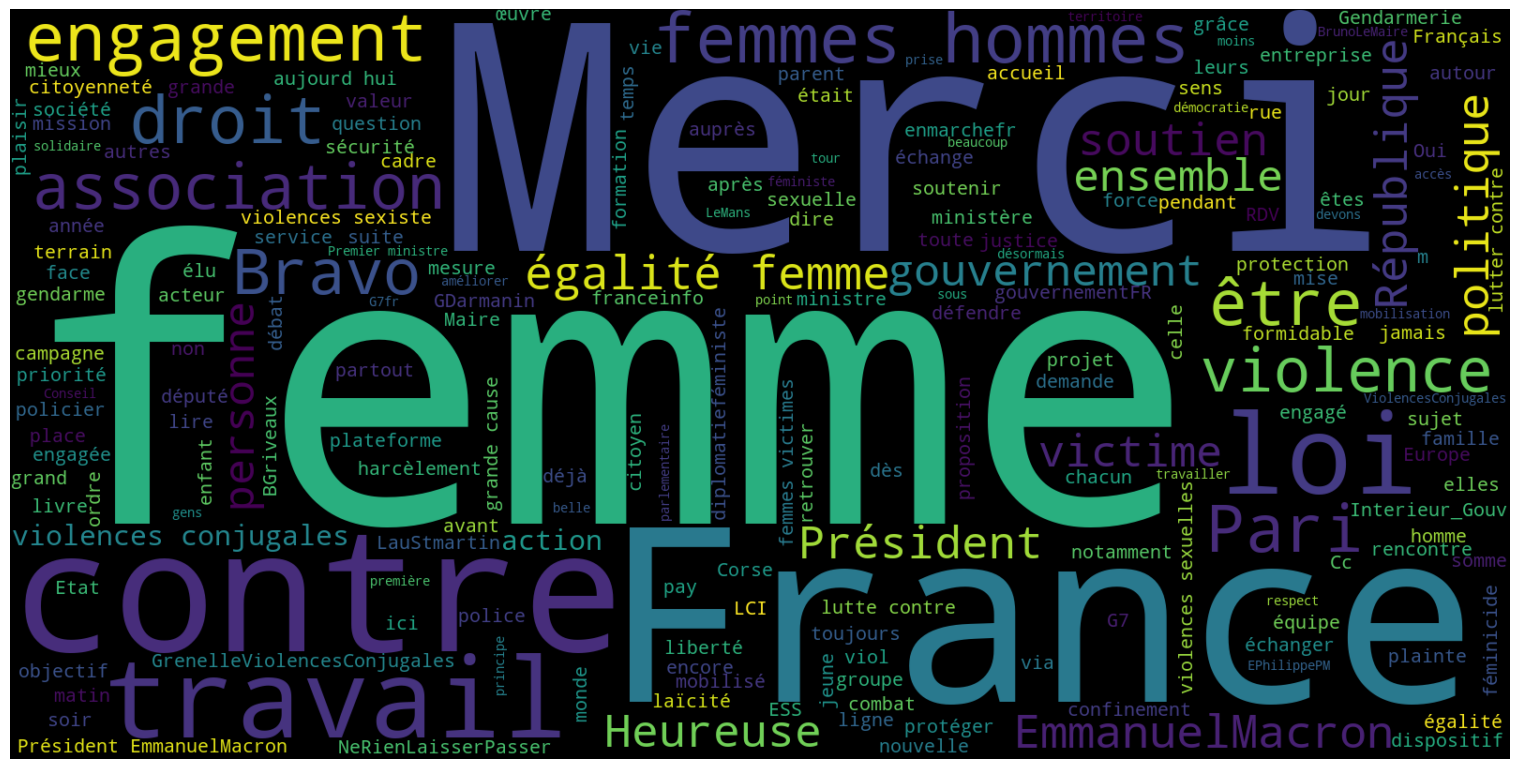

In [78]:
#Generate a Word-Cloud with french stopwords

exclure_mots = ["fois", "d’être", "n’est", "j’ai", "qu’il", 'amp', '&amp;', '—', 'd’une', 'Parce', 'parce', '?\"', '\"On','»,', '».', 'Ca', 'peu', 'ca', 'ça', 'quoi', 'deux', 'alors', 'avait', 'Quand', 'eu', 'qu’ils', 'eux', 'n’ont', 'quand', 'depuis', 'soit', 'avoir', "n’y", '🔴', '➡️', 'ans', 'parce', 'que', 'doit', 'ceux', 'dit', 'même', 'peut', "qu’on", '-', 'faire', 'lui', '.', "qu\'il", '📻', '⤵️', "d\'un", 'donc', "n\'a", 'M.', '\"Nous', "d\'un", 'veut', "n\'est", "d\'une", 'dont', 'me', 'bien', 'mes', 'rien', 'votre', 'sera', '📺', '"La', '"Les', '"Le', 'tout', '👉🏻', 'mon', 'fait', 'faut', '"Il', '"Je', '!"', '»', '📹', '«', 'Je', 'je', "c’est", 'ma', 'notre', 'mais', 'très', 'entre', 'sans', '?', '!', 'la', ':', 'la', 'le', 'les', 'La', 'été', 'mai', 'nos', 'on', 'tous', 'moi', 'cela', 'ai', 'j', 'an', 'Je', 'is', 'of', 'ils', 'it', 'our', 'ça', 'suis', 'veux', 'for', 'no', 'car', 'the', 'to', 'n\'est', 'http', 'va', 'J  ai', 'n', 'J ai', 'J\'ai', 'ses', 'avez', 'vos', 'ni', 'i', 'si', 'j ai', 'j\'ai', 'pa', 'pas', 'c\'est','nou', 'nous','au', 'aux', 'qu', 'ou', 'où', 'avons', 'in', 'la', ' là', 'cette', 'y', 'son', 'd', 'du', 'de', 'la', 'des', 'le', 'et', 'est', 'elle', 'une', 'en', 'que', 'aux', 'qui', 'ces', 'les', 'dans', 'sur', 'l', 'un', 'pour', 'par', 'il', 'ou', 'à', 'ce', 'a', 'sont', 'cas', 'plus', 'leur', 'se', 's', 'vous', 'au', 'c', 'aussi', 'toutes', 'autre', 'comme', 'avec', 'https', 'ne', 'que', 'sa', 'ont', 't', 'co']
text = " ".join(i for i in result.Tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=exclure_mots, background_color="black", width=1600, height=800).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [82]:
#Count occurences of a word in Tweet list

def tweet_counter():
    i=0
    for tweet in result.Tweet:
       i+= len(tweet.split())
    return i

def word_counter(word):
    counter = tweet_counter()
    i=0

    for tweet in result.Tweet:
        if word.lower() in tweet.lower():
            i+=1
            
    plop = ((i/counter)*100) 
    pourcentage = round(plop, 2)
    
    print("Dans le compte \"" + account + "\", \nle terme \"" + word + "\" se retrouve " + str(i) + " fois et représente " + str(pourcentage) + "% des mots utilisés au total dans ses tweets.")
    
    
    
word_counter("femme")


Dans le compte "MarleneSchiappa", 
le terme "femme" se retrouve 2448 fois et représente 0.83% des mots utilisés au total dans ses tweets.


In [81]:
#Ranking of most common words
from collections import Counter

tweet_splitted = []

for tweet in result.Tweet:
    tweet_array = []
    tweet_array.append(tweet.split())
    for string in tweet_array:
        tweet_splitted += string
    tweet_array = []

wordList = []
hashtagList = []
tagList = []

for word_tweet in tweet_splitted:
    if word_tweet.lower() in exclure_mots:
        continue
    elif len(word_tweet) <= 3:
        continue
    elif "@" in word_tweet:
        tagList.append(word_tweet)
        continue
    elif word_tweet[0] == "#":
        hashtagList.append(word_tweet)
        continue
    wordList.append(word_tweet)
    
N = 20

top_words = Counter(wordList).most_common(N)
top_hashtag = Counter(hashtagList).most_common(N)
top_tag = Counter(tagList).most_common(N)

print("Top 20 - Words frequency\n")
for word, frequency in top_words:
    print("%s %d" % (word, frequency))
    
print("\n\nTop 20 - Hashtags frequency\n")
for word, frequency in top_hashtag:
    print("%s %d" % (word, frequency))
    
print("\n\nTop 20 - Tags frequency\n")
for word, frequency in top_tag:
    print("%s %d" % (word, frequency))
    

    

Top 20 - Words frequency

femmes 1831
contre 1034
violences 967
Merci 878
France 521
travail 449
l’égalité 435
leurs 374
Bravo 354
être 348
victimes 329
Président 326
hommes 307
droits 297
protéger 286
associations 271
autour 264
lutte 261
harcèlement 257
mieux 257


Top 20 - Hashtags frequency

#GrenelleViolencesConjugales 280
#Paris 270
#NeRienLaisserPasser 160
#diplomatieféministe 130
#DiplomatieFéministe 127
#LeMans 100
#laïcité 93
#8mars 86
#G7Equality 84
#Corse 72
#ViolencesConjugales 65
#25novembre 59
#FranceEgalité 58
#NewYork 53
#G7France 52
#confinement 49
#ESS 48
#Corsica 46
#LGBT+ 46
#France 45


Top 20 - Tags frequency

@EmmanuelMacron 633
@enmarchefr 347
@gouvernementFR 305
@GDarmanin 257
@EPhilippePM 197
@Interieur_Gouv 194
@LauStmartin 180
@BGriveaux 140
@CCastaner 122
@NBelloubet 118
@LaREMParis 113
@StanGuerini 102
@UN_Women 99
@franceinfo 94
@agnesbuzyn 91
@G7fr 89
@BrunoLeMaire 88
@JulienBargeton 88
@jmblanquer 87
@PoliceNationale 83
